In [27]:
import pickle as pickel
import numpy as np
import matplotlib.pyplot as plt

In [28]:
base_path = './ckpts/ckpts-through-time'
parameter_paths = ['pretrain_chess.pt', 'finetune_chess.pt', 'pretrain_english.pt'] # + ['finetune_commentary.pt']

In [51]:
def get_mean_diff_by_idx(analytics):
    diffs = [analytics['bot_scores'][i] - analytics['comp_scores'][i] for i in range(len(analytics['bot_scores']))]
    max_length = max([game.size for game in diffs])

    diff_vec = np.empty((len(diffs), max_length))
    diff_vec.fill(np.nan)

    for i, diff in enumerate(diffs):
        diff_vec[i, :diff.size] = diff

    mean_diff_by_idx = np.nanmean(diff_vec, axis=0)

    return mean_diff_by_idx

def plot_mean_diff_by_idx(analytics, avg_window_size=1, title="", max_length=None):

    mean_diff_by_idx = get_mean_diff_by_idx(analytics)

    # convolve to get moving avg
    out = np.convolve(mean_diff_by_idx, np.ones(avg_window_size)/avg_window_size)

    plt.plot(out[:max_length], '.-', label=path.split('.pt')[0])
    plt.xlabel("Game move index")
    plt.title(title)
    if avg_window_size == 1:
        plt.ylabel("Avg Chept - Computer Score")
    else:
        plt.ylabel(f"Avg Chept - Computer Score [{avg_window_size} idx moving avg]")
    plt.legend()


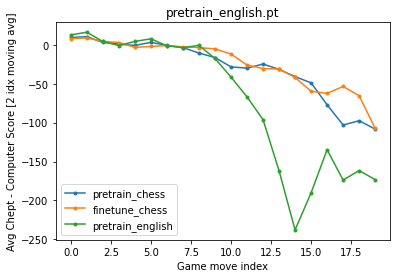

In [53]:
# plot the different curves for different checkpoints
for path in parameter_paths:
    with open(f'anal_{path}.anal', 'rb') as f:
        analytics = pickel.load(f)

    plot_mean_diff_by_idx(analytics, avg_window_size=2, title=path, max_length=20)
plt.show()